<a href="https://colab.research.google.com/github/tkeldenich/First_Project_with_Scikit-Learn_MachineLearning/blob/main/Scikit_Learn_Project_to_Start_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scikit-Learn Project to Start Machine Learning and Master it Now**

- [English Article](https://inside-machinelearning.com/en/scikit-learn-project-start-ml/)
- [French Article](https://inside-machinelearning.com/scikit-learn-projet-machine-learning/)

In this article, we will see how to implement your first Machine Learning models in this complete Scikit-Learn project!

**Scikit-Learn is THE basic library to do Machine Learning. It allows you to manage data, use AI models and much more!**

Scikit-Learn is ideal to process numerical data as well as texts. To do Machine Learning on images, we rather advise Deep Learning libraries like Keras which we have made [a tutorial right here!](https://inside-machinelearning.com/en/first-projec-keras/)

**In this article we will first do Exploratory Data Analysis (EDA) to understand our dataset. It will then allow us know which models to use to do Machine Learning!**

We will see different EDA techniques. Then we will see 5 Machine Learning models:

- **Logistic Regression**
- **Support Vector Machines – SVM**
- **Stochastic Gradient Descent**
- **Naive Bayes**
- **Decision Tree**

If you don’t know them yet, this article is for you 🎉

Let’s start right now !



## **Getting started**

### **Our data: Wine dataset**

Doing Machine Learning requires a Python environment in which you can code. You have several options: coding directly on your computer in a .py file or using a Jupiter Notebook (requiring [Anaconda](https://www.anaconda.com) to be installed).

Another much simpler solution is to use [Google Colab.](https://colab.research.google.com) This site offers you a ready to use Python Notebook. No installation is required, only a Google account and everything is free!

**Now that your environment is ready, we can start the Scikit-Learn project.**

To start, let’s import an essential library to do Machine Learning: Pandas.

Pandas is a Python library allowing to manipulate, display and modify easily our data. We import it into our environment like this:

In [ ]:
import pandas as pd

Now let’s take a look at our data.

For this project we will use the [*winequality-white*](https://github.com/tkeldenich/First_Project_with_Scikit-Learn_MachineLearning/blob/main/winequality-white.csv) dataset.

This dataset comes from [Kaggle](https://www.kaggle.com) the website hosting dozens of Machine Learning competitions every year.

**The goal of this project is to predict the quality of a wine based on different measurements.**

You can download the dataset [at this Github address.](https://github.com/tkeldenich/First_Project_with_Scikit-Learn_MachineLearning)

Once you have the file, put it in your environment. Then you can load it into a DataFrame (a Pandas object) by calling the Pandas `read_csv()` function:

In [ ]:
df = pd.read_csv("winequality-white.csv", sep=";")

As with any Machine Learning project, the first thing to do is to understand your data.

### **Features and target**

Our data is in CSV format (similar to Excel). It is a data file divided into rows and columns.

First, let’s display the data type for each column:

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Our dataset is composed of several wine features.

Moreover, our data are all numerical. No text is part of our dataset. This will greatly simplify this project (and that’s why we’ve chosen this dataset to start with)!

**To recap: each row of our dataset represents a wine and each column contains a features of this wine. From these features, our goal is to predict the `quality` column of the wine.**

Let’s now display a preview of our data.

For this we use the `head()` function which displays the head of the dataset, the first rows.

In [ ]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


Here we can already see the features scale.

**Can this impact our Machine Learning model? I let you answer in the comments section of [the article.](https://inside-machinelearning.com/en/scikit-learn-project-start-ml/)**

Now that we are familiar with our data, we can go into detail and analyze it technically.

## **First Step : Exploratory Data Analysis**



> **Exploratory Data Analysis** is the technical analysis phase of a dataset. It allows Data Scientists and Machine Learning Engineers to better understand their data. But above all it will help them determine the Machine Learning model they need to solve their tasks.



### **Univariate Analysis**


Univariate Analysis is the process of inspecting each feature separately.

This will allow us to deepen our knowledge about the dataset.

> We are in the comprehension phase here.

**The question associated with Univariate Analysis is: What are the data that compose our dataset?**

#### **Target**

##### **Numerical or Categorical Data?**

First of all, let’s analyze the most important data to us, the target data: `quality`.

When we earlier displayed the type of the target column, we noticed that it was composed of integers.

This can indicate two things:

- either we have an infinite potential of integers, from 0 to infinity
- either our space of possibility is restricted, for example from 0 to 5

To get to the bottom of this, we will take our quality data and display the unique values (if we have 50 rows with a quality of 8, we will display a single 8).

If we get a very large list, then we can consider that the potential is infinite but if we get a small list, it necessarily indicates that the space is limited.

In [ ]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

We have a list of seven numbers between 3 and 9. Hence our space is limited.

**This is an important information for Machine Learning. Since we have a restricted potential, we will use a classification Machine Learning model. Otherwise we would have used a regression model.**

This limited potential indicates that we can analyze these data as categorical variables

> **Categorical Data** are data that can be grouped into specific subparts (categories).

Here, we can, for example, talk about wines with a quality of 3. This is a category in our dataset.

We could not have done the same with the `chlorides` column which is composed of float.

##### **Distribution**

**Let’s move on to the visual analysis!**

First, we import the two main libraries for drawing graphs:

- matplotlib
- seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Then, we can display the occurrence of each category of wine quality. How many times the category 3, 4, 5, etc appears in our dataset.

In fact, we will make two graphs:

- **normalized graph**, which will allow us to know the distribution as a percentage
- **classic graph**, which will allow us to know the raw distribution

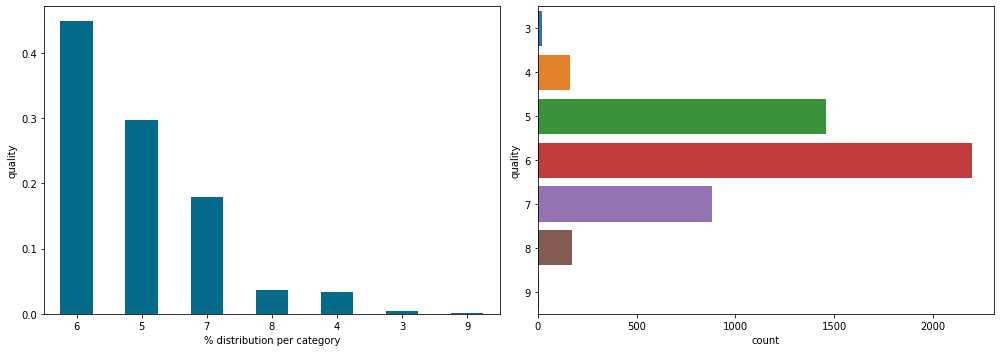

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
df['quality'].value_counts(normalize=True).plot.bar(rot=0, color='#066b8b')
plt.ylabel('quality')
plt.xlabel('% distribution per category')
plt.subplot(1,2,2)
sns.countplot(data=df,y='quality')
plt.tight_layout()
plt.show()   

On both graphs we see the same distribution which is normal.

First of all, we notice that quality 6 wines are the most represented in our dataset. On the left, we can see that they represent more than 40% of our dataset (we’re approaching 50%) and on the right that it represents about 2500 lines (so 2500 wines).

More generally, we can notice one thing against us: **the dataset is not equally distributed.**

This inequality can influence the performance of our Machine Learning model. Indeed, there are so few wines of quality 9 that the model will not be able to analyze the characteristics that differentiate it from the others

But on the other hand, the disparity in the distribution of a dataset is something normal that happens frequently in real world projects. It is a drawback that the Data Scientists / Machine Learning Engineers must be able to deal with.

#### **Features - Numerical Data**

##### **Distribution and Box plot**


Let’s now analyze the wines features. These are the data that will allow the Machine Learning model to detect the quality of the wines.

First, we can create a sub DataFrame containing only our features:

In [ ]:
df_features = df.drop(columns='quality')

Now let’s analyze the `alcohol` column which represents the alcohol degree of the wine.

We display here the distribution on a classical graph and on a box plot:

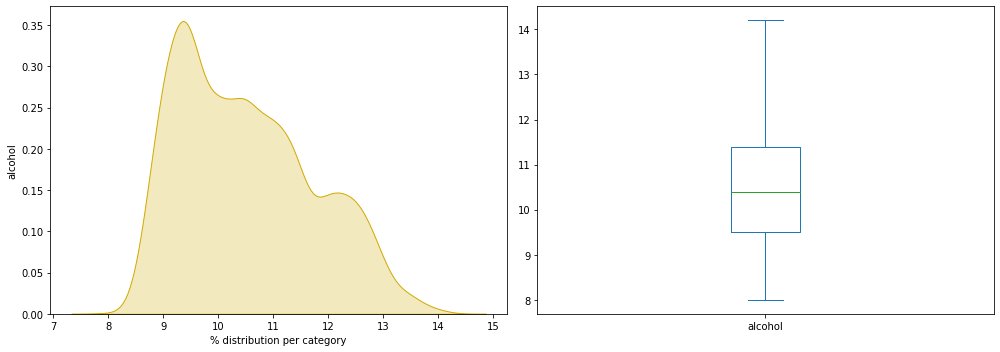

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.kdeplot(df_features['alcohol'],shade=True,color='#d1aa00')
plt.ylabel('alcohol')
plt.xlabel('% distribution per category')
plt.subplot(1,2,2)
df_features['alcohol'].plot.box()
plt.tight_layout()
plt.show()

We want to find out if there is any abnormality on our graph:

- unusual distribution
- missing data
- individual particularly far from the average

The graph looks quite normal, unlike the data analyzed in [our forest wildfire project.](https://inside-machinelearning.com/en/data-science-and-environment/)

##### **Grouped analysis**

Here, I propose to display the same graphs as before but for all our columns.

**To simplify things, we will create a Python loop.**

To do this we get the name of our characteristic columns:

In [ ]:
num_columns = df_features.columns.tolist()
num_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

Then we go through each of these columns to display our graphs (classical distribution and box plot):

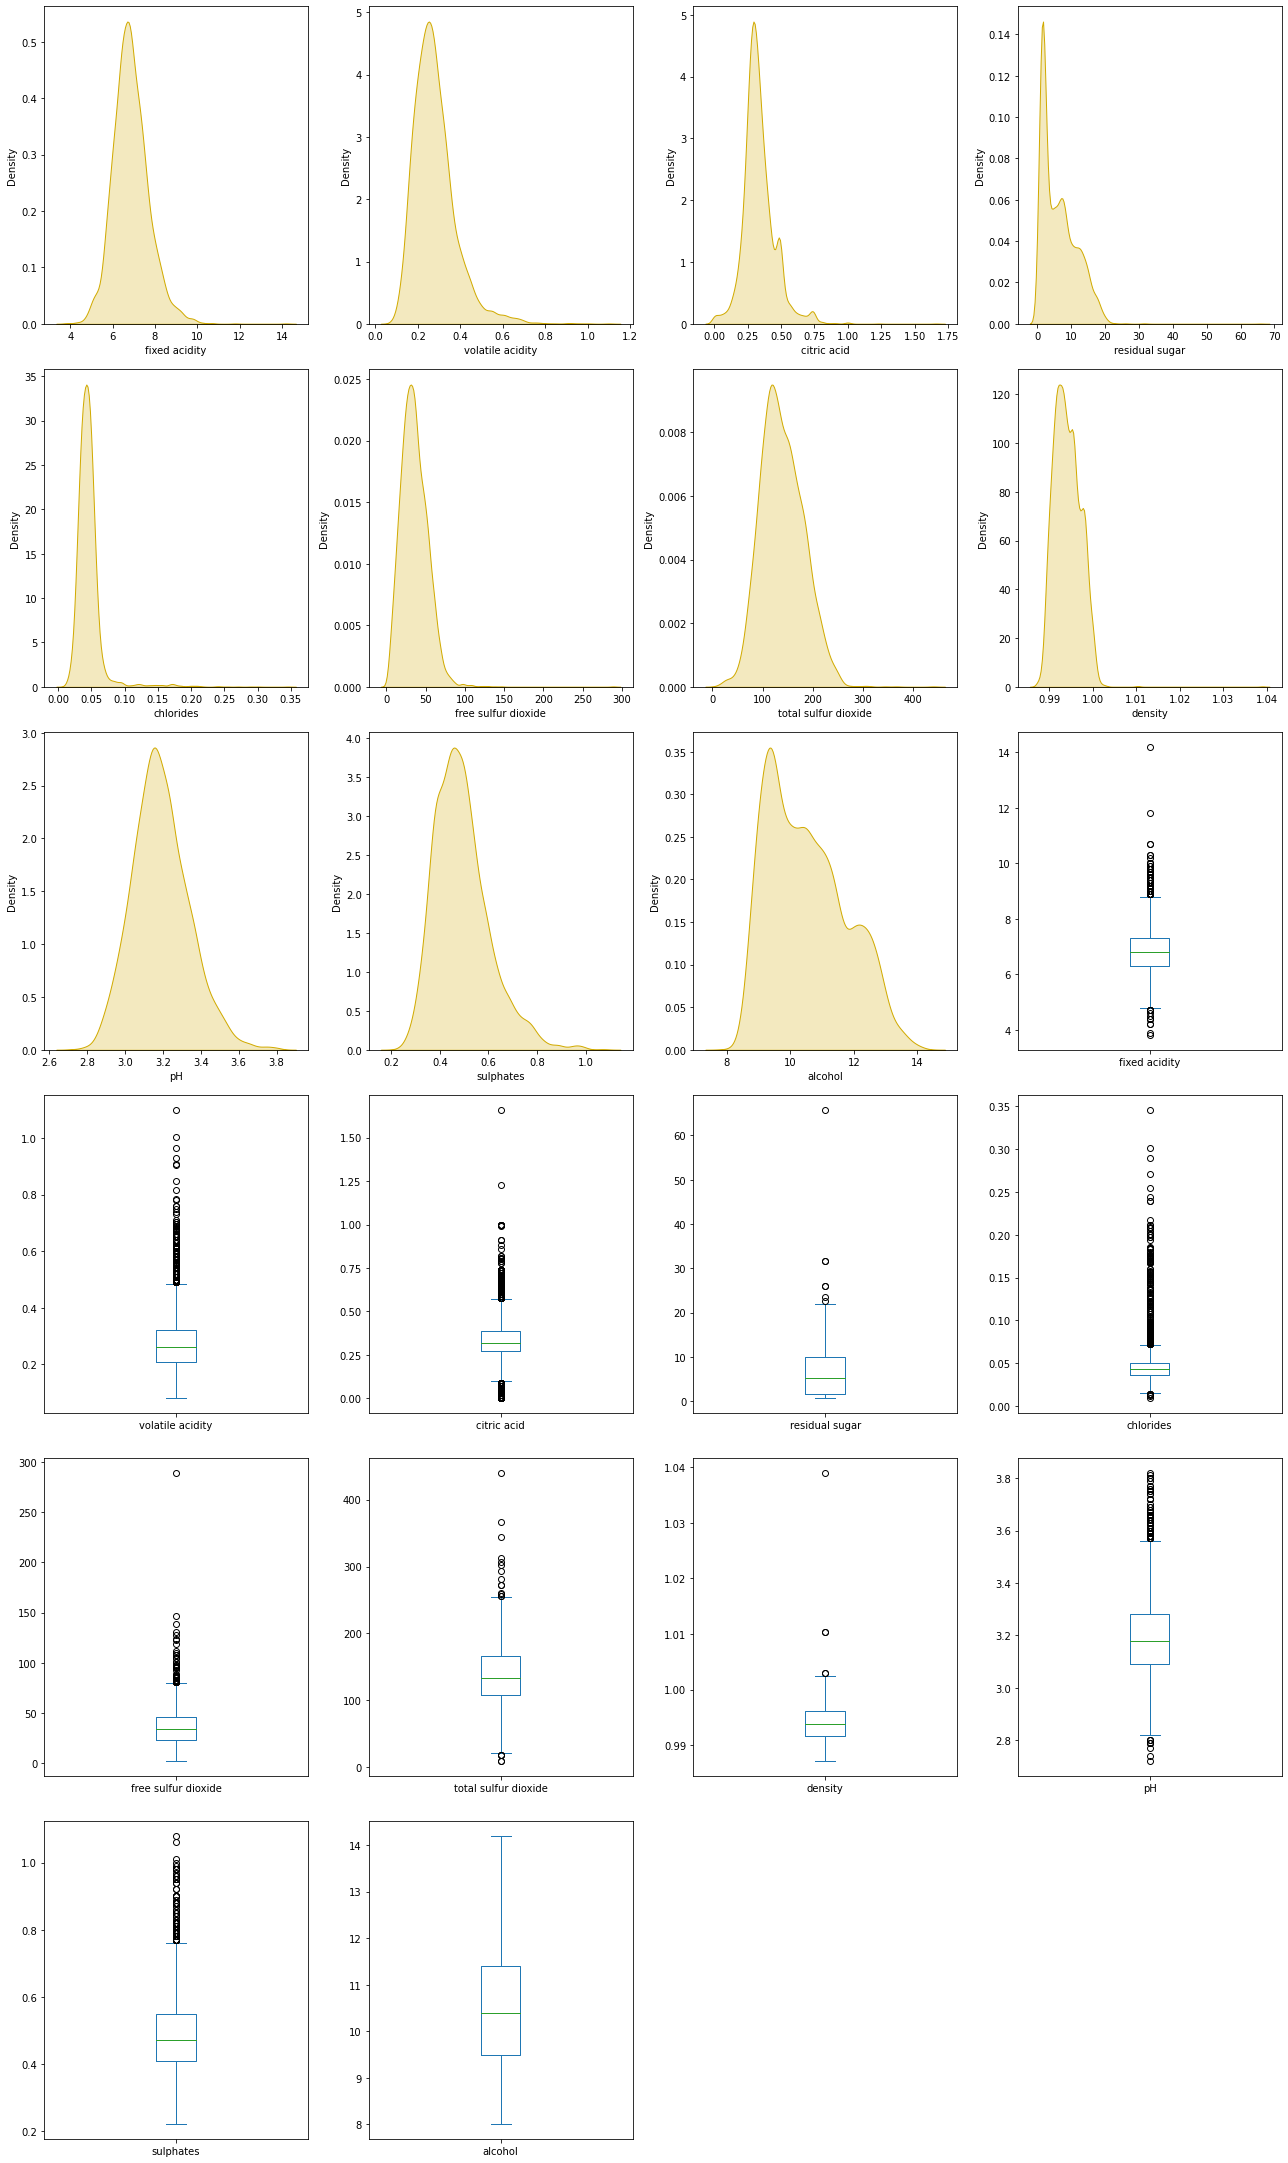

In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='#d1aa00',shade=True)
    plt.subplot(8,4,i+11)
    df[col].plot.box()
plt.tight_layout() 
plt.show()

**Do you find any outliers? unusual?**

Let’s take a shortcut to get the answer.

For this we use [Skewness and Kurtosis](https://inside-machinelearning.com/en/skewness-and-kurtosis/) two measures that allow to evaluate the distribution of data. We talk about them in more detail [in this article dedicated to the subject.](https://inside-machinelearning.com/en/skewness-and-kurtosis/)

Let’s display these two measures for each of our features columns:

In [ ]:
pd.DataFrame(data=[df[num_columns].skew(),df[num_columns].kurtosis()],index=['skewness','kurtosis'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
skewness,0.647751,1.576980,1.281920,1.077094,5.023331,1.406745,0.390710,0.977773,0.457783,0.977194,0.487342
kurtosis,2.172178,5.091626,6.174901,3.469820,37.564600,11.466342,0.571853,9.793807,0.530775,1.590930,-0.698425


We notice an unusual disparity in the `chlorides` with a kurtosis of 37 and a skewness of 5, in the `free sulfur dioxide` with a kurtosis of 11. The most balanced data are `pH` and `alcohol`.

It is determined that there are outliers, data with values very far from the average, for the columns `chlorides`, `free sulfur dioxide`, `density`, `citric acid` and `volatile acidity`.

In most distributions, it is normal to have extreme values.

**But outliers are not frequent, even abnormal. It may be an error in the dataset.**

So, error or unusual data? I let you determine for yourself and give your answer in comments 🔥

### **Bivariate Analysis**

We have now understood the distribution of our data thanks to the Univariate Analysis. The idea now is to continue this analysis by identifying the possible links between our features and our target, the quality of the wines.

**Bivariate Analysis is the fact of inspecting each of the features by putting them in relation with our target.**

This will allow us to make hypotheses about the dataset.

> We are in the theorization phase here.

**The question associated with Bivariate Analysis is: Is there a link between our features and the target?**

For example, there could be a link such as: the higher the density of the wine, the lower the quality.

If the link is that obvious, we can directly predict the quality of the wine just by looking at its density.

But if the links are more intricate and less certain, a complex Machine Learning model will be needed to achieve our goal.

#### **Numerical Data**

##### **Violin plot**

We have seen that our feature data is numerical data and our target data is categorical data.

This makes it easier for us to conduct our analysis.

We start with the sulphate analysis. Is there a relationship between the amount of `sulfates` and the quality of the wine?

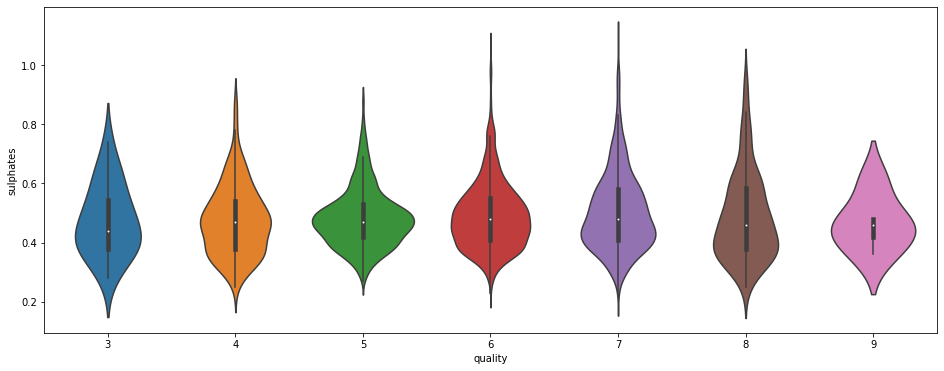

In [ ]:
plt.figure(figsize=(16,6))
sns.violinplot(data=df, x='quality', y='sulphates')

**The distribution seems to be the same for each quality of wine. Here, we want to find a pattern that would help us predict the quality of the wine.**

For example, it would have been interesting if we could see that the average sulfate level increases with the quality of the wine. Here, on the contrary, we see that the average remains the same for all categories. There are some extreme data for qualities 6, 7 and 8. But nothing notable or really useful to indicate a trend.

##### **Swarm plot**

Let’s now display the `total sulfur dioxide` in a swarm plot and as a function of the wine quality:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


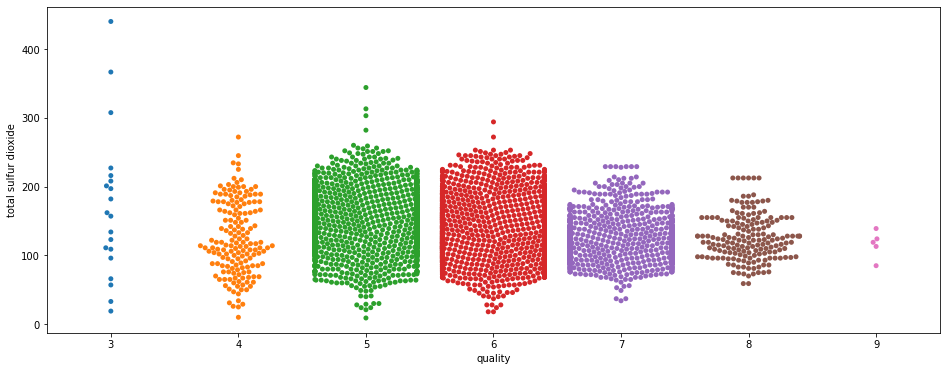

In [ ]:
plt.figure(figsize=(16,6))
sns.swarmplot(x="quality", y="total sulfur dioxide", data=df)

Here two things to notice.

First we see that there are many more points on data 5, 6 and 7.

**This is not a trend. On the contrary, this is a bias in our dataset.**

Remember that, above, we saw that there were more data for wine qualities 5, 6 and 7 and much less for data 3 and 9? This is what we see here and this is where the Univariate Analysis shows its importance because it allows us to identify the biases at the beginning of the project.

Indeed one could have thought that this abnormal distribution is specific to the feature `total sulfur dioxide`. In fact this distribution is an integral part of our dataset, and the bias we saw in the global analysis is reflected here in the more detailed analysis.

Secondly, we can notice a trend: as the quality of the wine increases, there is less `total sulfur dioxide`.

**The trend is weak but it exists.**

However, two things should be noted:

- it seems to break at wine quality 4
- the data for 3 and 9 are very sparse. What if the dataset were completed with more 3 and 9 wine varieties? Would we see the trend reversed?

**These questions will remain unanswered because the dataset is as is. Again, this is a recurring phenomenon in real-world datasets and it is important to know how to work around it(*but also to know when to ask the customer for more data*).**

##### **Working around the biases**

Here I propose a technique among others to evaluate this feature despite the lack of data.

First, we will assume that the dataset has a distribution representative of the real world. That is to say that we suppose that if we added thousands of wines to our dataset, the average of `total sulfur dioxide` that we would obtain would be the same as we have now.

**Hence, now we can analyze our current average and consider that the result obtained will be representative of the real world.**

We calculate the average of `total sulfur dioxide` for each quality of wine:

In [ ]:
quality_cat = df.quality.unique()
quality_cat.sort()
qual_TSD = []
for i,quality in enumerate(quality_cat):
  qual_TSD.append([quality, df['total sulfur dioxide'].loc[df['quality'] == quality].mean()])

We obtain 7 lines, with for each of them the mean of `total sulfur dioxide` corresponding to each quality level.

Let’s put these data in a new DataFrame:

In [ ]:
df_qual_TSD = pd.DataFrame(qual_TSD, columns =['Quality', 'Mean TSD'])

And now let’s analyze the average `total sulfur dioxide` for each quality level:

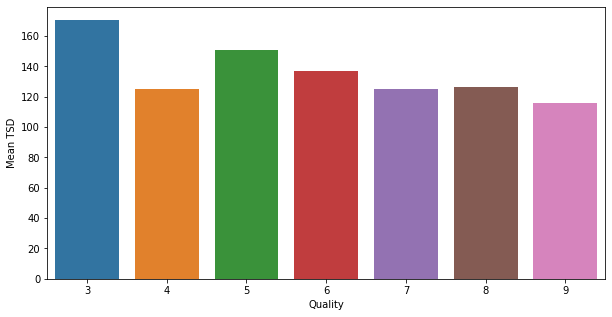

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="Quality", y="Mean TSD", data=df_qual_TSD)
plt.show()

The trend that we noticed before exists in our dataset.

The more the mean `total sulfur dioxide` decreases, the more the quality of the wine increases, with a break for quality 4.

Let’s continue our Bivariate Analysis!

#### **Categorical method on numerical data**

##### **Transforming our data**

Let’s see now another approach to analyze our data.

Our current data are numerical. That is to say that we cannot classify them in categories. At least not directly.

What I propose here is to transform our numerical data into categories. Will this help us in our analysis?

That’s what we’ll see right away!

Let’s take the alcohol column which represents the alcohol degree of each wine.

To transform this information into a category, we will choose values to sort them.

We will take all the wines with an alcohol content lower than 9.5° and put them in the category Low. And we will do like that for the 4 classes:

- Low when less than 9.5°.
- Moderate between 9.5° and 11°.
- High between 11° and 12.5°.
- Very High when higher than 12.5°.

*The alcohol level for our wines starting at 8° and ending at 14°, I made sure that each class has 1.5° difference. This separation is arbitrary. We could have chosen the quartiles indicated by the box plot in the univariate analysis.*

In [ ]:
def alcohol_cat(alcohol):
    if alcohol <= 9.5:
        return "Low"
    elif alcohol <= 11:
        return "Moderate"
    elif alcohol <= 12.5:
        return "High"
    else:
        return "Very High"

df['alcohol_category'] = df['alcohol'].apply(alcohol_cat)
df.sample(frac=1).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_category
4209,6.6,0.23,0.32,1.7,0.024,26.0,102.0,0.99084,3.29,0.60,11.80,6,High
3101,7.0,0.26,0.34,10.9,0.038,25.0,84.0,0.99432,3.11,0.34,10.90,6,Moderate
4553,5.7,0.28,0.30,3.9,0.026,36.0,105.0,0.98963,3.26,0.58,12.75,6,Very High
1395,6.9,0.19,0.33,1.6,0.039,27.0,98.0,0.98980,3.09,0.46,12.30,7,High
2816,7.2,0.17,0.41,1.6,0.052,24.0,126.0,0.99228,3.19,0.49,10.80,5,Moderate


That’s it! We have our new alcohol_category column that represents the alcohol degree as categorical data.

##### **Displaying our data**


Now I would like to relate this data to the quality of the wine.

For this we use a normalized Crosstab (Pandas object) that we display as a bar plot.

<Figure size 1080x2160 with 0 Axes>

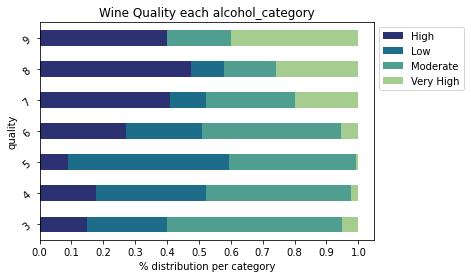

In [ ]:
import numpy as np

plt.figure(figsize=(15,30))

cross = pd.crosstab(index=df['quality'],columns=df['alcohol_category'],normalize='index')
cross.plot.barh(stacked=True,rot=40,cmap='crest_r').legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('% distribution per category')
plt.xticks(np.arange(0,1.1,0.1))
plt.title("Wine Quality each {}".format('alcohol_category'))
plt.show()

On this graph, we can see the category of alcohol degree that compose each of our wine quality categories.

We notice that there are no low alcohol wines in the quality 9 wines.

In general, we can see an obvious trend: as the alcohol content increases, the quality of the wine increases too.

This does not mean that a 14° wine is necessarily good. But rather that if you take a random 14° wine, there is a good chance that it will be a fine quality wine.


#### **Pearson & Heatmap formula**

In this first step of Exploratory Data Analysis, we have seen many different techniques to analyze our data.

Whether it is to understand and analyze the distribution or to detect the links between our features and our target.

I would like to propose you a last graph that is very popular in companies: heatmap.

Heatmap is a graph that allows you to directly identify the links between our features and our target (and more generally between each of our data):

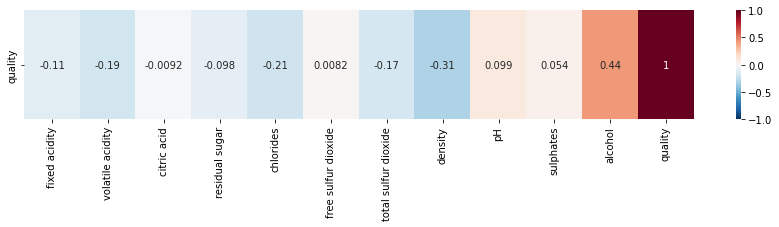

In [ ]:
plt.figure(figsize=(15,2))
sns.heatmap(df.corr().iloc[[-1]],
            cmap='RdBu_r',
            annot=True,
            vmin=-1, vmax=1)

The closer the value is to 0, the less correlation there is. The closer to 1, the more positive the correlation. And the closer to -1, the more negative the correlation is.

Here, we have only displayed the correlation between our features and our target. But you can display the correlation between all our data by changing the line in the code from `df.corr().iloc[[-1]]` to `df.corr()`.

We see that the columns most correlated with `quality` are :

- `alcohol`
- `density`
- `chlorides`
- `volatile acidity`

This type of information is essential to, later, influence the performance of our Machine Learning model.

And speaking of model, we now have enough information to do Machine Learning!

## **Second Step: Machine Learning**



### **Prepare your data**

Let’s start by preparing our data.

We already have a DataFrame for our features `df_features`, let’s take a DataFrame for our target called `df_label`:

In [ ]:
df_label = df['quality']

Now we separate our data into different sets. One for training, the other for testing.

One will be used to train our model, the other to test its performance.

**We call the features X and the label y(target).**

This gives us four data sets:

- X_train
- X_test
- y_train
- y_test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.20)

We separated them so that we have 80% of our total data in X and 20% in y. We check that the sets have the right size:

In [ ]:
print((len(X_train), len(y_train)))
print((len(X_test), len(y_test)))

(3918, 3918)
(980, 980)


With these data we can train Machine Learning models.

### **What is training in Machine Learning?**

**Here’s how training a model works:**

- Machine Learning model looks at each value of X_train and y_train
- It establishes a function that allows, with the X_train values, to find y_train
- We test the performance of the model by seeing if, from X_test, the model succeeds in deducing y_test

In other words, the model is trained to deduce the quality of wine from 80% of the bottles and their features.

The training is completed once the model has established an equation that relates the bottles of wine to their respective quality.

It can then test its performance on the remaining 20% of bottles.

> Its goal is to find a function that works for both the training data and the test data.

**The difficulty lies here.**

If the training data represents the real world then the model will perform well.

Conversely, if the data does not represent the wines diversity, then it will have more difficulty in predicting the test data.

Indeed, if the model never sees a wine of quality 9 during training, during the performance test, if it comes across a bottle of quality 9, it will not be able to classify it in the right way.

This is where the importance of Univariate Analysis comes in, as it allows us to understand the biases in our dataset and therefore the possible obstacles we will face.

But without further ado, let’s get down to business and FINALLY implement Machine Learning!

### **Machine Learning Models**

This article is designed for beginners in Machine Learning. Let’s assume that we don’t know which model to use.

We have only one information: we have to **predict categories**, levels of wine quality.

Hence it’s **a classification exercise.**

So we will use each classification model, understand how they work and evaluate their performance.

#### **Logistic Regression**

Logistic Regression is a model that allows us to infer a categorical variable from feature data.

The Machine Learning model of regression analyzes our data one by one to establish a simple rule to determine the category to which each wine belongs.

In mathematical terms, Logistic Regression builds a function that allows, from feature data, to calculate the probability of belonging to each class.

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

And the score obtained:

In [ ]:
logisticRegression.score(X_test, y_test)

0.46530612244897956

Let’s display the probabilities of belonging to each class for the first row of our dataset:

In [ ]:
logisticRegression.predict_proba(X_test.iloc[:1])

array([[0.00366244, 0.02245503, 0.2733634 , 0.47066811, 0.19223072,
        0.03623338, 0.00138692]])

- 3 : 0.003
- 4 : 0.022
- 5 : 0.273
- 6 : 0.470
- 7 : 0.192
- 8 : 0.036
- 9 : 0.001

Here the highest probability is for class 6. But what is the right result?


In [ ]:
y_test.iloc[:1]

1364    5
Name: quality, dtype: int64

#### **Support Vector Machines**

The Support Vector Machines is a high performance Machine Learning algorithm.

The SVM draws an empty space (let’s imagine a 2D space with abscissa and ordinate). Then it looks at each row of our dataset and gives it a position in the space according to its features (X) but also is category (y) to which it belongs. When a line belongs to a new category (a different quality of wine), it projects this point in order to maximize the distance between this category and the formers.

The model repeats this operation until it obtains a complete space called SVM map.

To predict, the SVM simply takes the new data and according to the features, positions its related point on the space. Its position will then give the category to which it belongs.

The SVM in practice :

In [ ]:
from sklearn import svm

SVM = svm.SVC()
SVM.fit(X_train, y_train)

SVC()

And the score obtained:

In [ ]:
SVM.score(X_test, y_test)

0.46530612244897956

#### **Stochastic Gradient Descent**


If you’ve understood how SVM works, you will easily understand Stochastic Gradient Descent.

SVM consists of taking points and projecting them onto a space, a plane, in such a way as to maximize the distance between the different categories.

In mathematical terms, this is called finding the optimal of a function.

And the Stochastic Gradient Descent (SGD) is in fact an optimizer that allows to improve algorithms (or functions) such as SVM, Logistic Regression, etc.

The same optimizer is used in Neural Networks. This makes SGD one of the fundamental Machine Learning concepts.

Let’s use it now, by default it optimizes an SVM:

In [ ]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier()
SGD.fit(X_train, y_train)

SGDClassifier()

And the score obtained:

In [ ]:
SGD.score(X_test, y_test)

0.4642857142857143

#### **Naive Bayes**

The Naive Bayes algorithm is based on [Bayes’ Theorem.](https://en.wikipedia.org/wiki/Bayes%27_theorem)

In non-mathematical language, the Theorem considers that our features are related to our target, and that we can draw a function to links them together.

The principle is the same as for most Classification Algorithms. The difference lies in the function used to establish the links between our data.

We add a naive approach to this theorem (hence the name Naive Bayes), i.e. we consider that the features are independent from one another.

For example, here we have two features fixed acidity and volatile acidity. We can consider that these two characteristics are correlated because they both measure an acidity level. Well, even if they are correlated, Naive Bayes will assume that they are independent in its analysis.

This approach may seem counter-intuitive but on some datasets, the Naive Bayes performs miracles!

The Naive Bayes in action:

In [ ]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

And the score obtained:

In [ ]:
GNB.score(X_test, y_test)

0.4448979591836735

#### **Decision Tree**

The Decision Tree is one of the most widely used algorithms and the easiest to understand!

It makes hypotheses in the form of a tree. Each node of the tree represents a hypothesis about a characteristic.

The tree can have a huge length and may test several features in different ways.

Here is how to use the Decision Tree:



In [ ]:
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

And the score obtained:

In [ ]:
decisionTree.score(X_test, y_test)

0.6091836734693877

One last thing about the Decision Tree: you can easily display the tree thanks to the GraphViz library.

This tree is essential to understand how our Machine Learning Algorithm makes its choices. This is one of the characteristics that makes it indispensable to Data Scientists and Machine Learning Engineers!

In [ ]:
import graphviz 

dot_data = tree.export_graphviz(decisionTree, out_file=None,
                                feature_names=df_features.columns.to_list(),
                                class_names=df_label.name,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("wine")

'wine.pdf'

## **Going further…**

As you have seen, most of our models have a performance between 40 and 50%.

The Decision Tree surpasses them all by obtaining an accuracy of 60%!

A Machine Learning model is considered good when it reaches 70% accuracy. And it is considered reliable when its performance exceeds 80%.

**Fortunately, we have only scratched the surface of Machine Learning.**

There are multiple methods to improve a Machine Learning model:

- [Normalize data](https://inside-machinelearning.com/en/normalize-your-data/)
- [Cross-Validation](https://inside-machinelearning.com/en/cross-validation-tutorial/)
- [Changing the models hyperparameters](https://inside-machinelearning.com/en/decision-tree-and-hyperparameters/)
- [Data Augmentation](https://inside-machinelearning.com/en/data-augmentation-csv-data/)
- [Ensemble methods](https://inside-machinelearning.com/en/ensemble-methods/)

We could for example start by using the SGD with Logistic Regression instead of the SVM!

**And you, what score did you get and how did you do?**

Want to stay tuned? Feel free to subscribe to our newsletter 😉